In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.cm as cm #colormap

In [6]:
x, y = make_blobs(n_samples=500, n_features=2, centers=4, random_state=100000)

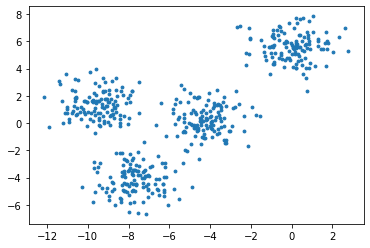

In [7]:
fig, ax1 = plt.subplots(1,1)
ax1.scatter(x[:,0],x[:,1]
           ,marker='o'
           ,s=8)
plt.show()

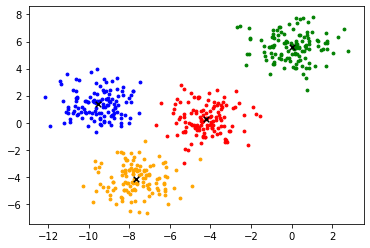

In [8]:
n_clusters = 4
cluster = KMeans(n_clusters=n_clusters, random_state=10000).fit(x)


colors=['red','green','orange','blue']

fig, ax1 = plt.subplots(1,1)

for i in range(4):
    ax1.scatter(x[y==i,0],x[y==i,1]
           ,marker='o'
           ,s=8
           ,c=colors[i])
ax1.scatter(cluster.cluster_centers_[:,0],
            cluster.cluster_centers_[:,1],
            marker = "x",
            s=30,
            c='black')
plt.show()


In [9]:
n_clusters = 4
cluster = KMeans(n_clusters=n_clusters, random_state=10000).fit(x)

In [10]:
y_pred = cluster.labels_
y_pred

array([0, 1, 3, 0, 2, 0, 0, 3, 0, 0, 2, 2, 2, 1, 3, 3, 0, 3, 0, 3, 3, 3,
       0, 2, 1, 2, 3, 2, 3, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2,
       0, 3, 2, 2, 0, 0, 1, 3, 3, 3, 1, 3, 0, 2, 2, 3, 0, 1, 0, 3, 2, 1,
       3, 0, 0, 3, 0, 1, 1, 1, 0, 0, 2, 2, 3, 3, 1, 1, 3, 2, 0, 0, 2, 2,
       0, 0, 3, 0, 3, 2, 0, 0, 3, 1, 2, 0, 3, 0, 2, 3, 3, 1, 2, 2, 2, 2,
       1, 3, 1, 1, 1, 2, 3, 0, 3, 2, 0, 1, 1, 1, 1, 2, 1, 3, 2, 3, 1, 0,
       2, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 2, 3, 3, 0, 2, 3, 3, 2, 0, 0, 3,
       3, 0, 3, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 0, 2,
       0, 0, 2, 3, 0, 1, 2, 1, 3, 1, 3, 2, 0, 2, 3, 2, 2, 2, 2, 2, 0, 0,
       2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 1, 2, 2, 2, 3, 2, 1, 3, 2, 3,
       3, 2, 0, 1, 2, 0, 0, 0, 0, 3, 2, 0, 2, 1, 2, 2, 3, 0, 1, 3, 3, 2,
       0, 2, 0, 0, 2, 3, 3, 0, 1, 3, 0, 0, 2, 2, 3, 3, 2, 3, 1, 2, 2, 1,
       1, 0, 1, 0, 3, 3, 0, 2, 1, 0, 3, 3, 0, 1, 1, 0, 1, 3, 0, 2, 3, 3,
       0, 3, 2, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1,

In [11]:
pre = cluster.predict(x)
sum(pre != y_pred)

0

In [12]:
centroid = cluster.cluster_centers_
centroid

array([[ 0.02642417,  5.59271536],
       [-4.2275807 ,  0.25547886],
       [-9.52627606,  1.36728741],
       [-7.6909034 , -4.17024233]])

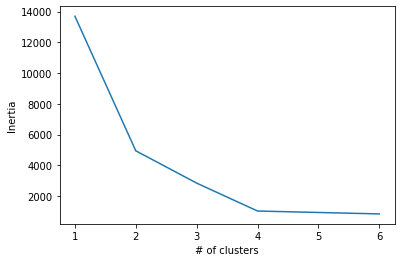

In [13]:
inertia = []
n_clusters = [1,2,3,4,5,6]
for i in n_clusters:
    cluster = KMeans(n_clusters=i, random_state=10000).fit(x)
    inertia.append(cluster.inertia_)
plt.figure()
plt.plot(n_clusters, inertia)
plt.xlabel("# of clusters")
plt.ylabel("Inertia")
plt.show()

In [14]:
#criteria to evaluate the k-means model:
# if labels are known, we can use the following:
# mutual_info_score (0,1)
# V_measure (0,1)
# adjusted_rand_score (-1,1)
# if labels are not known, we can use:
# silhouette_score (the average silhouette score of all samples)
# silhouette_sample (the silhouette scores of all samples)
# calinski_harabaz_score

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [16]:
silhouette_score(x,y_pred)

0.6724886142316635

In [17]:
silhouette_samples(x,y_pred)

array([0.7449214 , 0.71421382, 0.7257666 , 0.78030679, 0.77163577,
       0.75826314, 0.74030771, 0.15453367, 0.76210035, 0.81377454,
       0.73200588, 0.63533799, 0.67654089, 0.72152272, 0.68446034,
       0.46113127, 0.7609808 , 0.75279929, 0.8093233 , 0.77431872,
       0.74591335, 0.73674901, 0.79280309, 0.6958224 , 0.72858993,
       0.45092491, 0.56887125, 0.52692608, 0.70696168, 0.81631661,
       0.58077855, 0.59449901, 0.54661369, 0.70306881, 0.77593227,
       0.60811724, 0.31902873, 0.75660816, 0.7543204 , 0.81522802,
       0.68736149, 0.74990952, 0.15054992, 0.61935782, 0.70256928,
       0.60284233, 0.66072474, 0.67393488, 0.79318776, 0.74828501,
       0.64266257, 0.7467533 , 0.45781618, 0.66280028, 0.6168185 ,
       0.72613891, 0.67301289, 0.71768623, 0.64735124, 0.74441637,
       0.67592329, 0.48671855, 0.80325778, 0.7117224 , 0.7454086 ,
       0.70009249, 0.76482564, 0.65262489, 0.79900423, 0.76120626,
       0.77626326, 0.75749481, 0.6560018 , 0.69202592, 0.76088

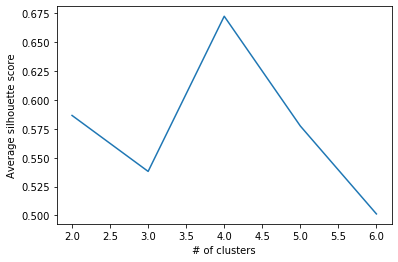

In [18]:
silhouette = []
n_clusters = [2,3,4,5,6]
for i in n_clusters:
    cluster = KMeans(n_clusters=i, random_state=10000).fit(x)
    y_pred = cluster.labels_
    silhouette.append(silhouette_score(x,y_pred))
plt.figure()
plt.plot(n_clusters, silhouette)
plt.xlabel("# of clusters")
plt.ylabel("Average silhouette score")
plt.show()

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'cali

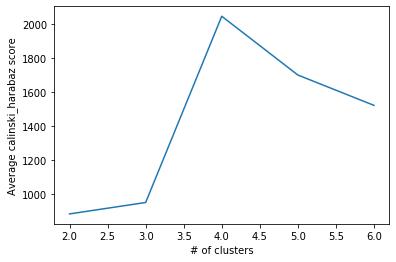

In [19]:
from sklearn.metrics import calinski_harabaz_score
calinski_harabaz = []
n_clusters = [2,3,4,5,6]
for i in n_clusters:
    cluster = KMeans(n_clusters=i, random_state=10000).fit(x)
    y_pred = cluster.labels_
    calinski_harabaz.append(calinski_harabaz_score(x,y_pred))
plt.figure()
plt.plot(n_clusters, calinski_harabaz)
plt.xlabel("# of clusters")
plt.ylabel("Average calinski_harabaz score")
plt.show()

In [20]:
from time import time

t0 = time()
silhouette_score(x,y_pred)
time()-t0

0.006936073303222656

In [21]:
t0 = time()
calinski_harabaz_score(x,y_pred)
time()-t0

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


0.0009968280792236328

In [22]:
import datetime
datetime.datetime.fromtimestamp(t0).strftime("%Y-%m-%d %H:%M:%S")

'2020-02-04 06:51:56'

for n_clusters =  2 , the average silhouette score is 0.586584520696405


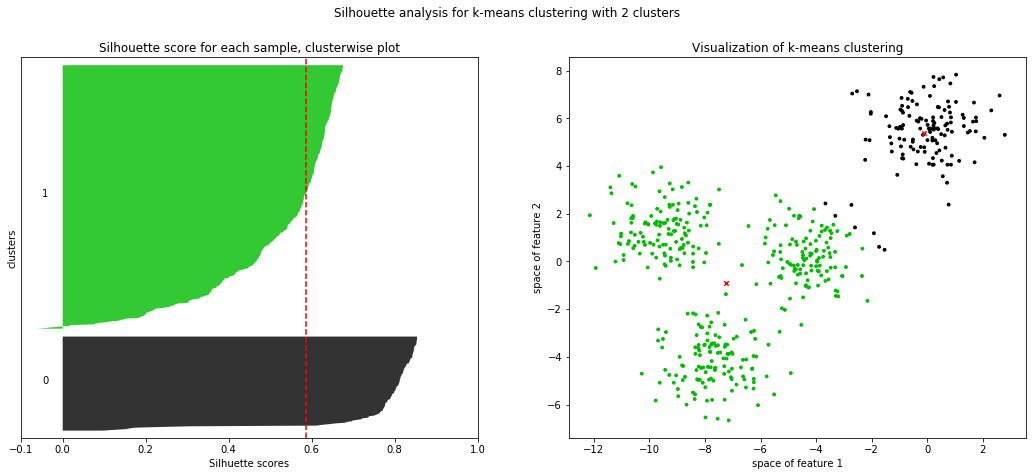

for n_clusters =  3 , the average silhouette score is 0.5381339371617234


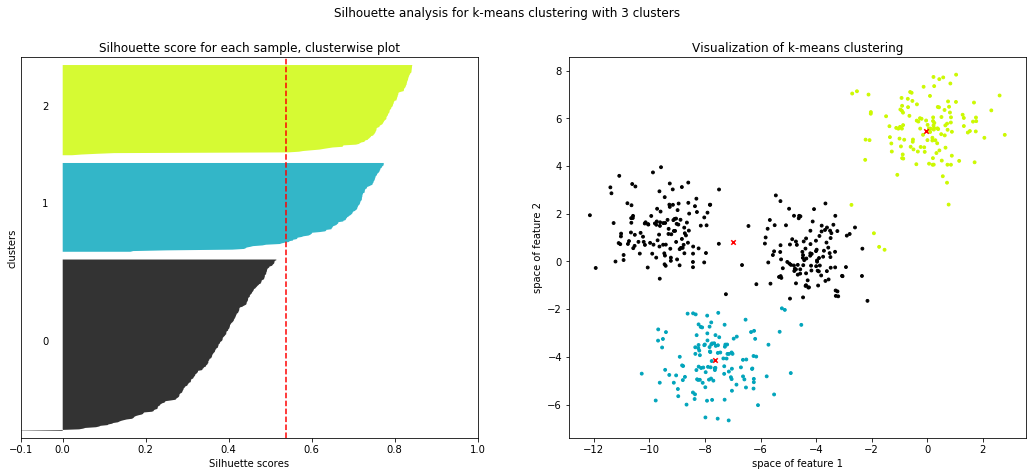

for n_clusters =  4 , the average silhouette score is 0.6724886142316635


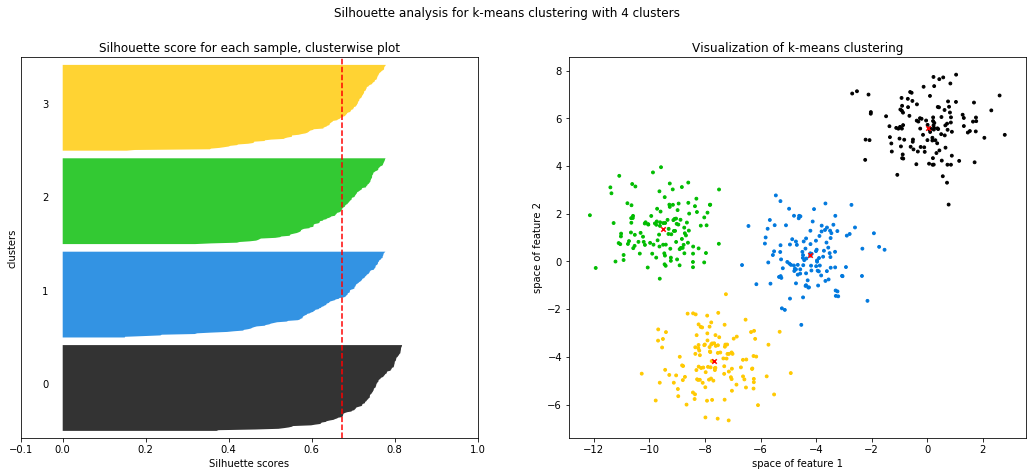

for n_clusters =  5 , the average silhouette score is 0.5774592732108379


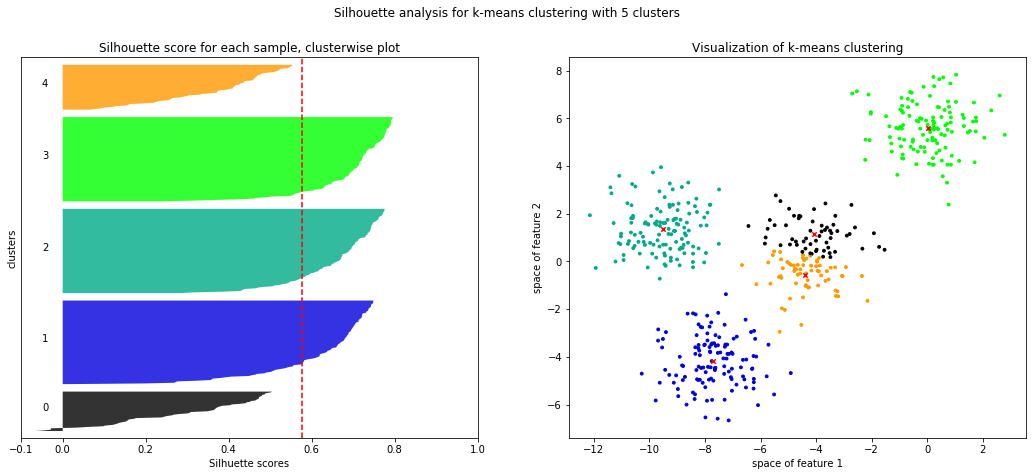

for n_clusters =  6 , the average silhouette score is 0.5013254464152315


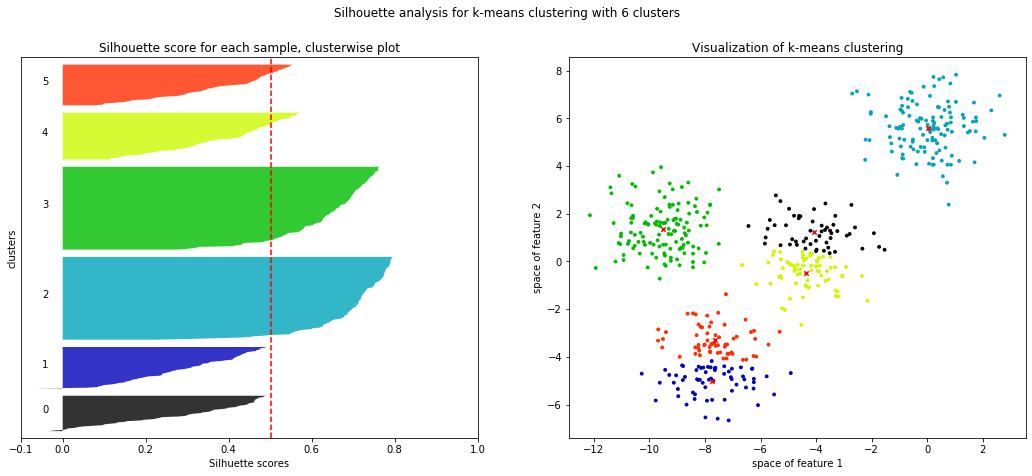

for n_clusters =  7 , the average silhouette score is 0.4030656982533681


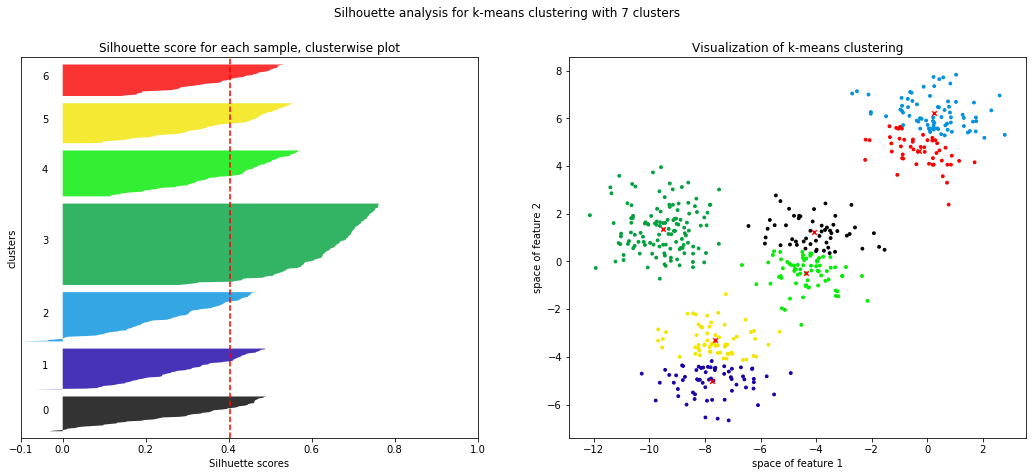

In [31]:
# to plot the silhouette values for all samples

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

n_clusters = [2,3,4,5,6,7]

for n_cluster in n_clusters:
    cluster = KMeans(n_clusters=n_cluster, random_state=10000).fit(x)
    cluster_labels = cluster.labels_
    silhouette_avg = silhouette_score(x,cluster_labels)
    print("for n_clusters = ", n_cluster, ", the average silhouette score is",silhouette_avg)
    silhouette_all_samples = silhouette_samples(x,cluster_labels)
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,x.shape[0]+(n_cluster+1)*10])
    
    y_lower = 10
    for i in range(n_cluster):
        ith_cluster_silhouette = silhouette_all_samples[cluster_labels==i]
        ith_cluster_silhouette.sort()
        size_ith_cluster = ith_cluster_silhouette.shape[0]
        y_upper = y_lower + size_ith_cluster
        color = cm.nipy_spectral(float(i)/n_cluster)
        ax1.fill_betweenx(np.arange(y_lower,y_upper)
                         ,ith_cluster_silhouette
                         ,facecolor=color
                         ,alpha=0.8)
        ax1.text(-0.05, y_lower+0.5*size_ith_cluster, str(i))
        y_lower = y_upper + 10
    
    ax1.axvline(x=silhouette_avg, c="red",linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1.0])
    ax1.set_title("Silhouette score for each sample, clusterwise plot")
    ax1.set_xlabel("Silhuette scores")
    ax1.set_ylabel("clusters")
    
    colors = cm.nipy_spectral(cluster_labels/n_cluster)
    ax2.scatter(x[:,0],x[:,1]
                ,marker = "o"
                ,s=8
                ,c=colors)
    centers = cluster.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1]
               ,marker="x"
               ,s=20
               ,c="red")
    ax2.set_xlabel("space of feature 1")
    ax2.set_ylabel("space of feature 2")
    ax2.set_title("Visualization of k-means clustering")
    
    plt.suptitle("Silhouette analysis for k-means clustering with {0:d} clusters".format(n_cluster))
    plt.show()
    